In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table , Column
from astropy.io import fits
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'stixgeneral'
%matplotlib inline

In [8]:
# import the data file
data_pth = '/Users/greg/Desktop/git_projects/catalog_plots/data/'
model = data_pth + 'um_smdpl_model_logms_tot_11.4.fits'

In [21]:
hdu1 = fits.open(model)
# create astropy table of useful data
model_table = Table()
model_table['z_pos'] = hdu1[1].data['z']
model_table['vz'] = hdu1[1].data['vz']
model_table['x_pos'] = hdu1[1].data['x']
#model_table.sort('logms_tot_mod')
redshift = 0.37

## Test halotools

In [22]:
from halotools.mock_observables import apply_zspace_distortion
from astropy.cosmology import Planck15 as cosmo
z_dis = apply_zspace_distortion(model_table['z_pos'], model_table['vz'], redshift, cosmo, 400.0)
model_table['z_dist'] = z_dis

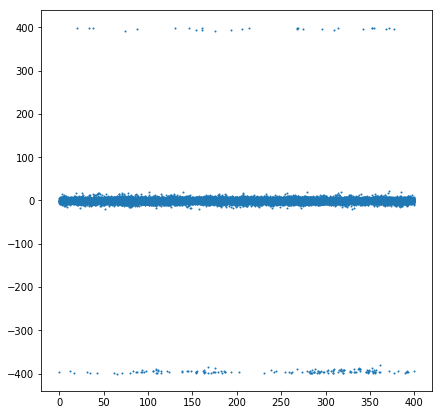

In [31]:
fig = plt.figure(figsize = [7,7])

ax1 = fig.add_subplot(111)
ax1.scatter(model_table['x_pos'],model_table['z_pos'] - model_table['z_dist'], s = 1)